#Import necesaary libraries

In [20]:
#connect to google drive
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [21]:
#connect to kaggle
!mkdir -p ~/.kaggle
!cp drive/MyDrive/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [22]:
#download the dataset
!kaggle datasets download --unzip uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 22.2MB/s]


In [23]:
#import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
#read dataset
data = pd.read_csv('diabetes.csv')

In [25]:
#visualize the head of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In the dataset, there are 9 columns:


1.   Pregnancies - the number of pregnanices
2.   Glucose - plasma glucose concentration a 2 hours in an oral glucose tolerance test
3.   BloodPressure - Diastolic blood pressure (mm Hg)â
4.   SkinThickness - Triceps skin fold thickness (mm)
5.   Insulin - 2-Hour serum insulin (mu U/ml)
6.   BMI - Body mass index (weight in kg/(height in m)^2)
7.   DiabetesPedigreeFunction - Diabetes pedigree function (Diabetes pedigree function (DPF) calculates diabetes likelihood depending on the subject's age and his/her diabetic family history.)
8.   Age - Age (years)
9.   Outcome - 1 if the person has diabetes and 0 if the person doesn't have diabetes.





In [26]:
# shape
data.shape

(768, 9)

In [27]:
# types
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [28]:
#verify if there are any NaN values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#Exploratory Data Analysis

##Univariate Analysis

In [29]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


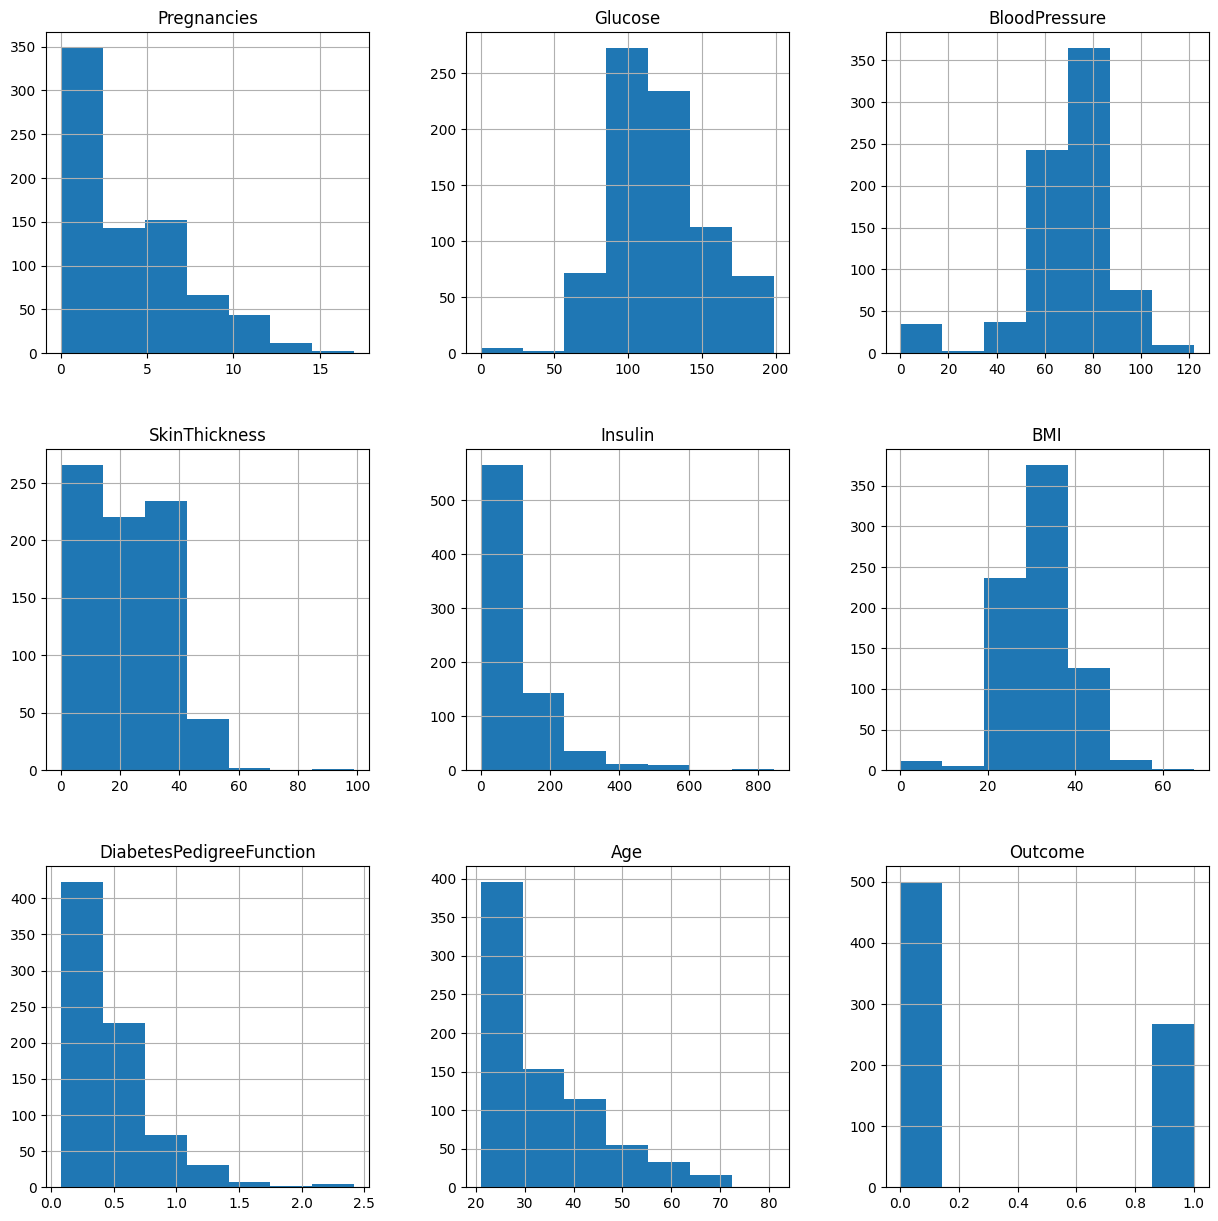

In [30]:
data.hist(bins=7, figsize=(15, 15))
plt.show()

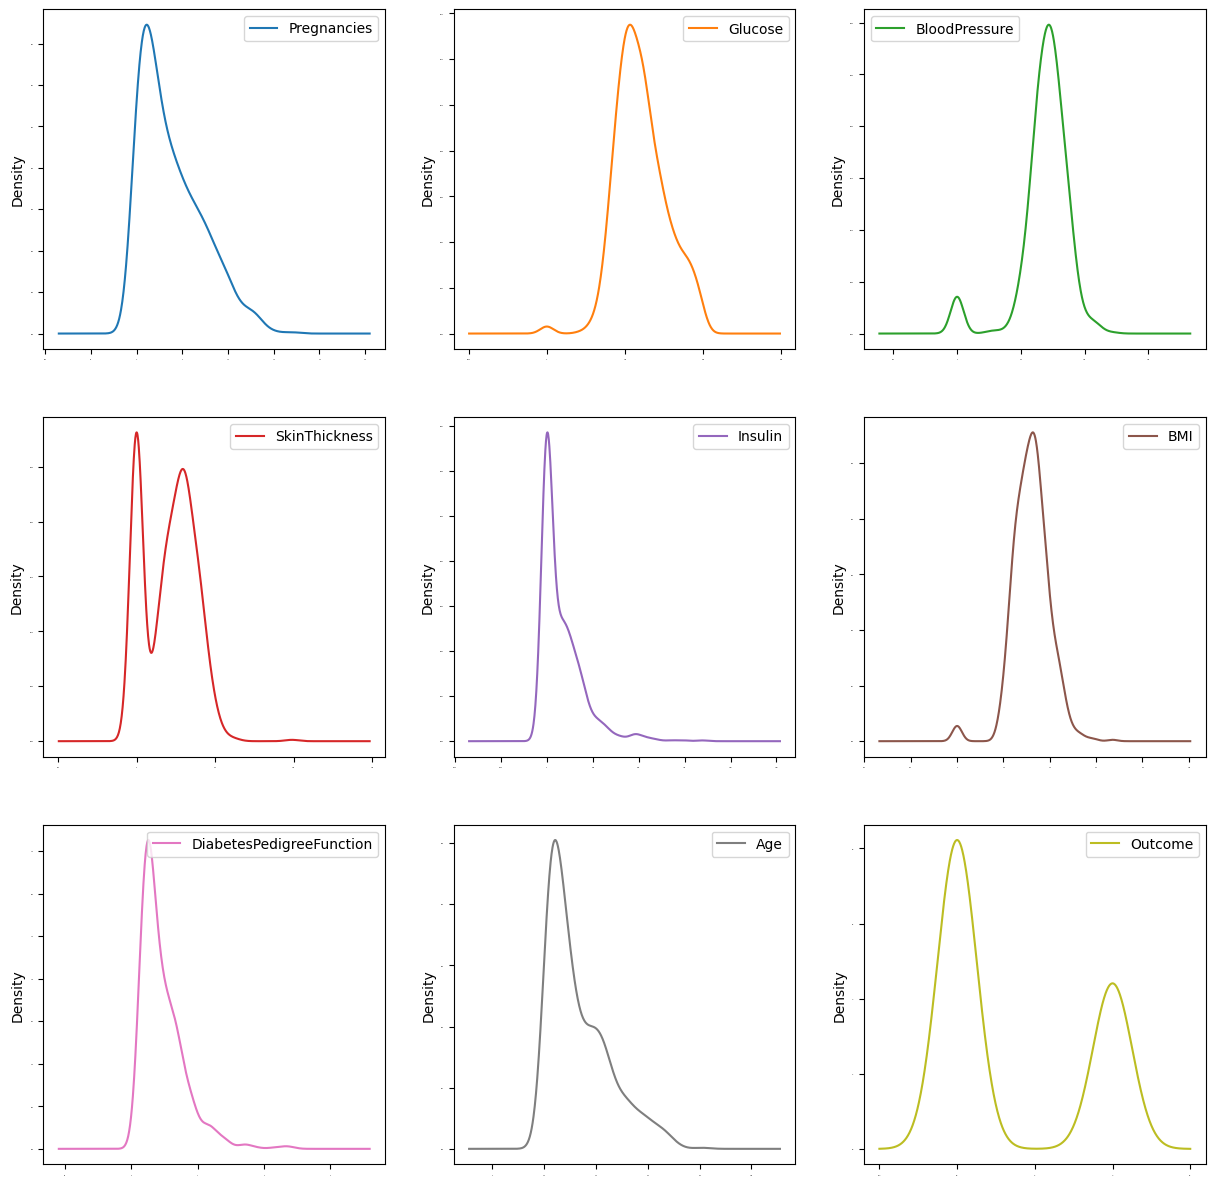

In [31]:
data.plot(kind="density", subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=1, figsize=(15, 15))
plt.show()

##Multivariate Analysis

**Hypothesis 1:** If women give birth to more children, they are more prone to having diabetes.


<Axes: xlabel='Outcome', ylabel='Pregnancies'>

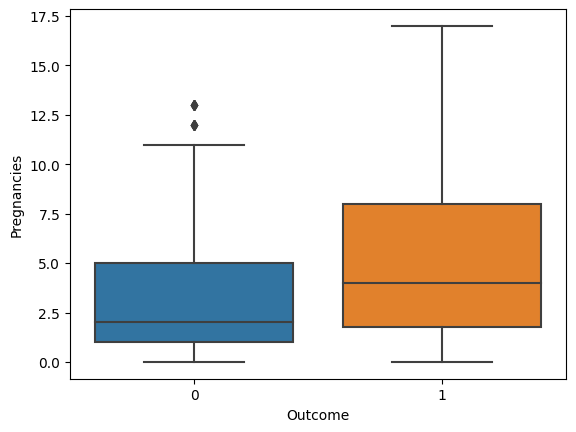

In [32]:
sns.boxplot(x = data['Outcome'],
            y = data['Pregnancies'])

**Conclusion:** Indeed, women with more pregnancies seem to have diabetes.

**Hypothesis 2:** If people have high levels of glucose, they might have diabetes.

<Axes: xlabel='Outcome', ylabel='Glucose'>

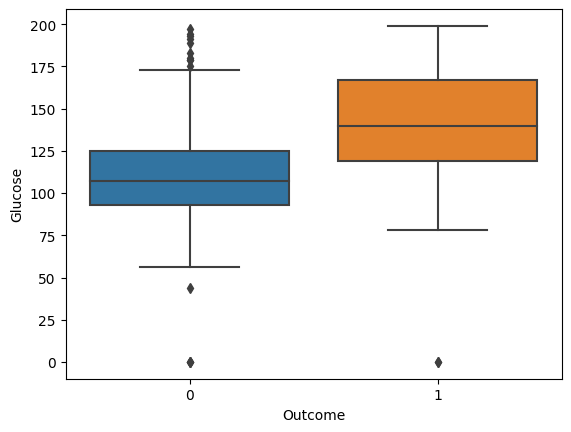

In [33]:
sns.boxplot(x = data['Outcome'],
            y = data['Glucose'])

**Conclusion:** Indeed, people with higher levels of glucose have diabetes.

**Hypothesis 3:** If people have high blood pressure, they are prone to having diabetes.

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

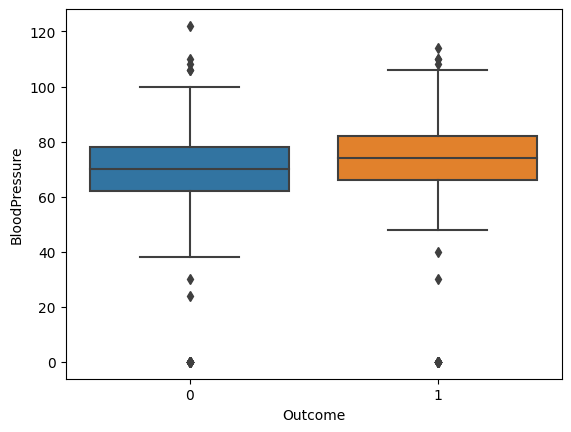

In [34]:
sns.boxplot(x = data['Outcome'],
            y = data['BloodPressure'])

**Conclusion:** Blood pressure is not a determining factor when it comes to having diabetes.

**Hypothesis 4:** If people have diabetes, they have thicker skin.

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

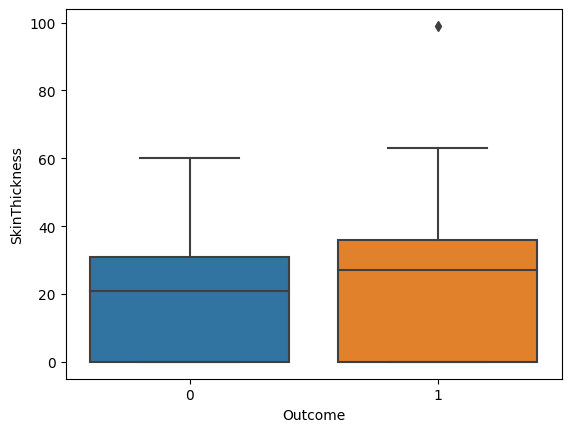

In [35]:
sns.boxplot(x = data['Outcome'],
            y = data['SkinThickness'])

**Conclusion:** Diabetes doesn't have a direct influence onto the thickness of skin.

**Hypothesis 5:** If people have high insulin, they have diabetes.

<Axes: xlabel='Outcome', ylabel='Insulin'>

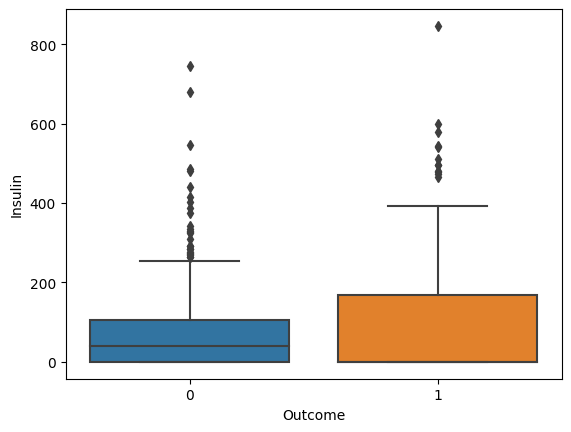

In [36]:
sns.boxplot(x = data['Outcome'],
            y = data['Insulin'])

**Conclusion:** Diabetes is present in individuals with high insulin, but the orange boxplot starts from 0 too, which means that diabetes is also present in individuals with low insulin.

**Hypothesis 6:** If people have high BMI, they are prone to having diabetes.

<Axes: xlabel='Outcome', ylabel='BMI'>

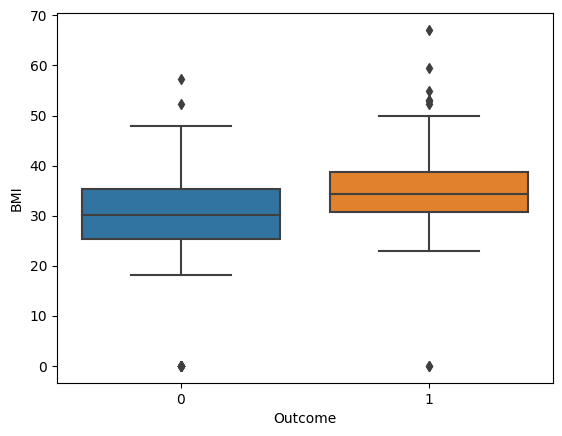

In [37]:
sns.boxplot(x = data['Outcome'],
            y = data['BMI'])

**Conclusion:** Indeed, individuals with higher BMI tend to have diabetes.

**Hypothesis 7:** If individuals have a high PDF, they are more likely to have diabetes.

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

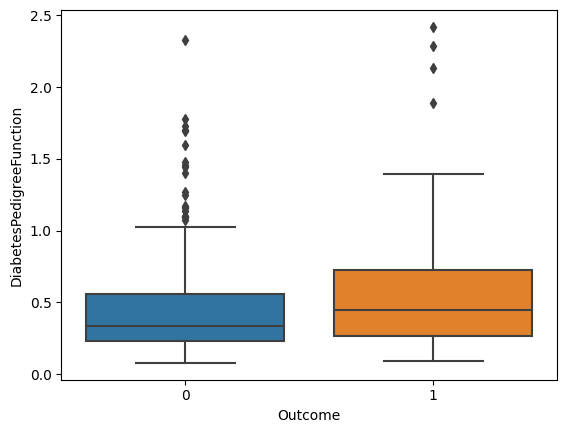

In [38]:
sns.boxplot(x = data['Outcome'],
            y = data['DiabetesPedigreeFunction'])

**Conclusion:** Individuals with high PDF are more likely to have Diabetes.

**Hypothesis 8:** If people are older, they are more susceptible to Diabetes.

<Axes: xlabel='Outcome', ylabel='Age'>

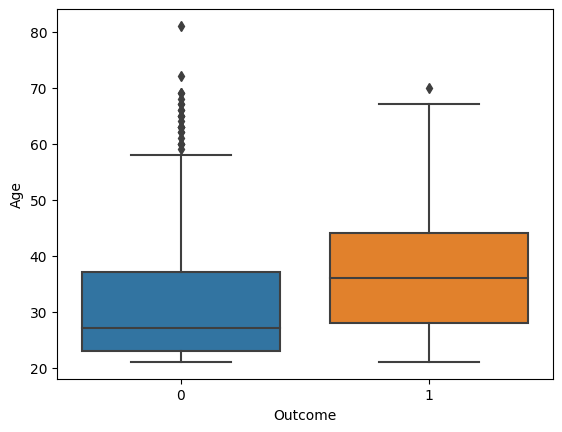

In [39]:
sns.boxplot(x = data['Outcome'],
            y = data['Age'])

**Conclusion:** Older people are more susceptible to Diabetes.

In [40]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

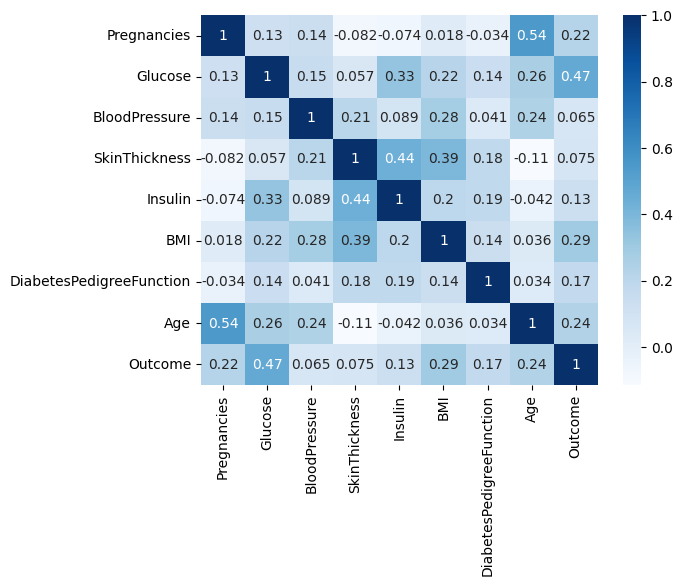

In [42]:
sns.heatmap(data.corr(), cmap="Blues", annot=True)

**Conclusion:** Variable Outcome is strongly related to the variables: Pregnancies, Glucose, Insulin, BMI, DiabetesPedigreeFunction and Age.

#Data Cleaning and Preparation



In [44]:
#get rid of the columns that aren't needed
data.drop(columns=['BloodPressure', 'SkinThickness'], axis=1, inplace=True)

In [45]:
data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


In [46]:
#delete outliers and keep the data in within 3 standard deviations
standard_deviations = 3
cleaned_data = data[data.apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations)
   .all(axis=1)]

In [47]:
#visualize dataset
cleaned_data.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,3.831006,120.526536,69.671788,32.227235,0.453186,33.050279,0.339385
std,3.295802,30.016650,89.437871,6.656942,0.283443,11.347049,0.473832
min,0.000000,44.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,116.000000,24.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,139.000000,120.500000,36.300000,0.605500,40.000000,1.000000
max,13.000000,199.000000,415.000000,55.000000,1.461000,68.000000,1.000000


In [49]:
#apply feature scalling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

scaler = StandardScaler()
scaler.fit(data[cols_to_scale])

data[cols_to_scale] = scaler.transform(data[cols_to_scale])

In [50]:
#visualize dataset
cleaned_data.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,3.831006,120.526536,69.671788,32.227235,0.453186,33.050279,0.339385
std,3.295802,30.016650,89.437871,6.656942,0.283443,11.347049,0.473832
min,0.000000,44.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,116.000000,24.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,139.000000,120.500000,36.300000,0.605500,40.000000,1.000000
max,13.000000,199.000000,415.000000,55.000000,1.461000,68.000000,1.000000


In [53]:
#split data
X = data.drop(columns = 'Outcome', axis = 1)
y = data['Outcome']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [61]:
X_train

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
762,1.530847,-0.998208,-0.692891,-1.204791,-0.996266,-0.020496
127,-0.844885,-0.090591,0.123302,0.165937,-0.636871,-0.871374
564,-1.141852,-0.935613,-0.692891,0.051710,0.389969,-0.531023
375,2.421746,0.597947,2.129051,0.914761,0.169500,2.106697
663,1.530847,0.754432,0.435886,0.749766,0.498693,0.575118
...,...,...,...,...,...,...
763,1.827813,-0.622642,0.870031,0.115169,-0.908682,2.532136
192,0.936914,1.192592,-0.692891,-0.202129,-0.268417,0.234767
629,0.046014,-0.841722,-0.692891,-0.925569,-0.978145,-1.041549
559,2.124780,-1.123396,-0.692891,-0.240205,-0.519087,0.149679


In [62]:
y_train

762    0
127    0
564    0
375    1
663    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 576, dtype: int64

In [63]:
X_test

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
661,-0.844885,2.444478,-0.692891,1.384362,2.784923,-0.956462
122,-0.547919,-0.434859,0.175399,0.204013,-0.204994,-0.871374
113,0.046014,-1.405071,-0.692891,0.254780,-0.244256,-0.701198
14,0.342981,1.411672,0.826616,-0.785957,0.347687,1.511083
529,-1.141852,-0.309671,-0.692891,-0.938260,0.568156,-0.190672
...,...,...,...,...,...,...
366,0.639947,0.097192,-0.692891,-0.557503,-0.313719,-0.360847
301,-0.547919,0.723135,0.479300,-0.049826,-0.150632,-0.701198
382,-0.844885,-0.372265,0.887396,-0.836725,1.434930,-1.041549
140,-0.250952,0.222381,-0.692891,-1.382478,-0.615731,1.851434


In [64]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: Outcome, Length: 192, dtype: int64

#Model Creation

In [65]:
#import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

In [66]:
#create a list of the models to use it later
models = [
          KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski'),
          DecisionTreeClassifier(random_state = 0),
          RandomForestClassifier(n_estimators = 500, random_state = 0),
          LogisticRegression(random_state = 0),
          BernoulliNB()
]


In [67]:
#import accuracy score
from sklearn.metrics import accuracy_score

In [68]:
#create a function that will train the models and will return a dictionary of their accuracy score
def test_model(trainx, testx, trainy, testy, models):
  accuracy = {}
  for i in range(len(models)):
        models[i].fit(trainx, trainy)
        y_pred = models[i].predict(testx)

        accuracy[str(models[i].__class__())] = accuracy_score(testy, y_pred)

  return accuracy

In [69]:
#get the accuracy score
accuracy = test_model(X_train, X_test, y_train, y_test, models)

In [70]:
#print the accuracy score and select the best model
accuracy

{'KNeighborsClassifier()': 0.7552083333333334,
 'DecisionTreeClassifier()': 0.7447916666666666,
 'RandomForestClassifier()': 0.796875,
 'LogisticRegression()': 0.7916666666666666,
 'BernoulliNB()': 0.71875}

**Conclusion:** The models that performed best are RandomForestClassifier, with an accuracy of 0.796875 and LogisticRegression, with an accuracy of 0.7916666666666666.